In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

In [5]:
def make_df(directory):
    csv = pd.read_csv(directory)
    df = pd.DataFrame(csv)
    return df

In [6]:
df_train = make_df('/kaggle/input/spaceship-titanic/train.csv')
df_test = make_df('/kaggle/input/spaceship-titanic/test.csv')

In [7]:
df_train.shape

(8693, 14)

In [8]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [10]:
pd.set_option('display.max_rows', 20)
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [11]:
df_train_Na = df_train.copy()
df_train_NaDrop = df_train_Na.dropna(axis=0)

In [12]:
def factorize_obj(df):
    for i in df.select_dtypes('object'):
        df[i], _ = df[i].factorize()
    return df

In [13]:
def mu_info(df):
    y = df['Transported']
    X = df.copy()
    X = factorize_obj(X)
    info = mutual_info_classif(X, y)
    
    for i, feature in enumerate(X.columns):
        print(f'Feature: {feature}, MI: {info[i]}')
    minfo = pd.DataFrame({'Feature': X.columns, 'MI_Score': info})
    
    return minfo

In [14]:
def plot_sns(df):
    sns.set_theme()
    
    g = sns.relplot(
        data = df,
        x="Feature", y="MI_Score"
    )
    g.set_xticklabels(rotation=90)

In [15]:
nadrop_minfo = mu_info(df_train_NaDrop)

Feature: PassengerId, MI: 0.008340808999290683
Feature: HomePlanet, MI: 0.030982927311037134
Feature: CryoSleep, MI: 0.11616431547283446
Feature: Cabin, MI: 0.013045558734803508
Feature: Destination, MI: 0.009402161823960586
Feature: Age, MI: 0.007396216546022405
Feature: VIP, MI: 0.0
Feature: RoomService, MI: 0.07277847703550955
Feature: FoodCourt, MI: 0.049050201142911254
Feature: ShoppingMall, MI: 0.05595428298673033
Feature: Spa, MI: 0.07384303696372752
Feature: VRDeck, MI: 0.05960750281617422
Feature: Name, MI: 0.007920495145246065
Feature: Transported, MI: 0.6941804305435245


In [16]:
nadrop_minfo

,Feature,MI_Score
0,PassengerId,0.008341
1,HomePlanet,0.030983
2,CryoSleep,0.116164
3,Cabin,0.013046
4,Destination,0.009402
5,Age,0.007396
6,VIP,0.000000
7,RoomService,0.072778
8,FoodCourt,0.049050
9,ShoppingMall,0.055954


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


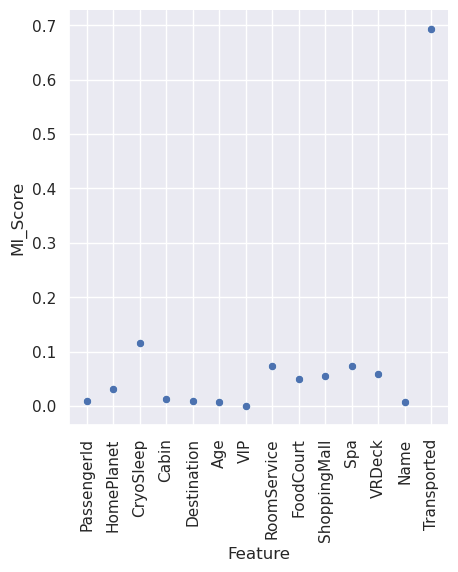

In [17]:
plot_sns(nadrop_minfo)

# Preprocessing

expand and consolidate data

In [18]:
def separate_cabin(df):
    df[['Pri_cabin', 'Sub_cabin', 'Cabin_num']] = df['Cabin'].str.split('/', expand=True, n=3)
    return df

In [19]:
df_train_filt = separate_cabin(df_train_NaDrop)

df_train_filt['Ameniti_paid'] = df_train_filt['RoomService'] + df_train_filt['FoodCourt'] + df_train_filt['ShoppingMall']+ df_train_filt['Spa']+ df_train_filt['VRDeck']

/tmp/ipykernel_32/3697028067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Pri_cabin', 'Sub_cabin', 'Cabin_num']] = df['Cabin'].str.split('/', expand=True, n=3)
/tmp/ipykernel_32/3697028067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Pri_cabin', 'Sub_cabin', 'Cabin_num']] = df['Cabin'].str.split('/', expand=True, n=3)
/tmp/ipykernel_32/3697028067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [20]:
df_train_filt.drop(['Cabin', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)

/tmp/ipykernel_32/1839288363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filt.drop(['Cabin', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)


In [21]:
df_train_filt

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Pri_cabin,Sub_cabin,Cabin_num,Ameniti_paid
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,B,0,P,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,Juanna Vines,True,F,0,S,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,Altark Susent,False,A,0,S,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,Solam Susent,False,A,0,S,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,Willy Santantines,True,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,Gravior Noxnuther,False,A,98,P,8536.0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,Kurta Mondalley,False,G,1499,S,0.0
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,Fayey Connon,True,G,1500,S,1873.0
8691,9280_01,Europa,False,55 Cancri e,32.0,False,Celeon Hontichre,False,E,608,S,4637.0


In [22]:
df_train_filt.dropna(axis=0, inplace=True)

/tmp/ipykernel_32/2177775657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filt.dropna(axis=0, inplace=True)


In [23]:
minfo = mu_info(df_train_filt)

Feature: PassengerId, MI: 0.0073154859869193345
Feature: HomePlanet, MI: 0.0258816623557534
Feature: CryoSleep, MI: 0.11245254352410239
Feature: Destination, MI: 0.0043910298407829895
Feature: Age, MI: 0.00950090983419849
Feature: VIP, MI: 0.0
Feature: Name, MI: 0.00761270758297794
Feature: Transported, MI: 0.6950886957569669
Feature: Pri_cabin, MI: 0.021373142687819646
Feature: Sub_cabin, MI: 0.009342648525706654
Feature: Cabin_num, MI: 0.0
Feature: Ameniti_paid, MI: 0.13307541742461804


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


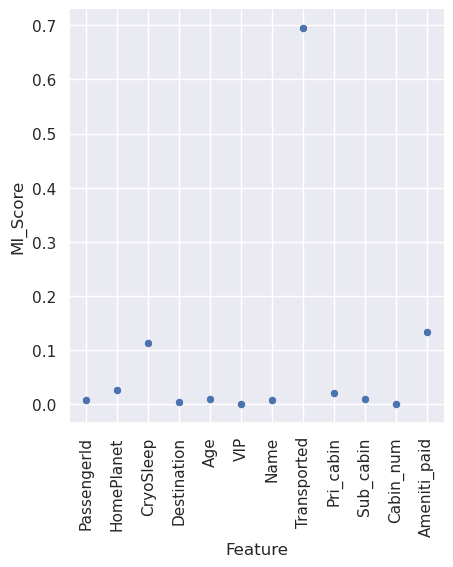

In [24]:
plot_sns(minfo)

# Boxplot high Mu_info

In [25]:
def sns_boxplot(df, x, y):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=x, y=y)

    # Customize plot appearance
    plt.title(x + y)
    plt.xlabel(x)
    plt.ylabel(y)

    # Show the plot
    plt.show()

In [26]:
def sns_countplot(df, x, y):
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x=x, hue=y)
    
    plt.title(x + y)
    plt.xlabel(x)
    plt.ylabel(y)

    # Show the plot
    plt.show()

In [27]:
def sns_scatter(df, x, y, hue):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, style=hue)
    
    plt.title(x+y)
    plt.xlabel(x)
    plt.ylabel(y)
    
    plt.show()

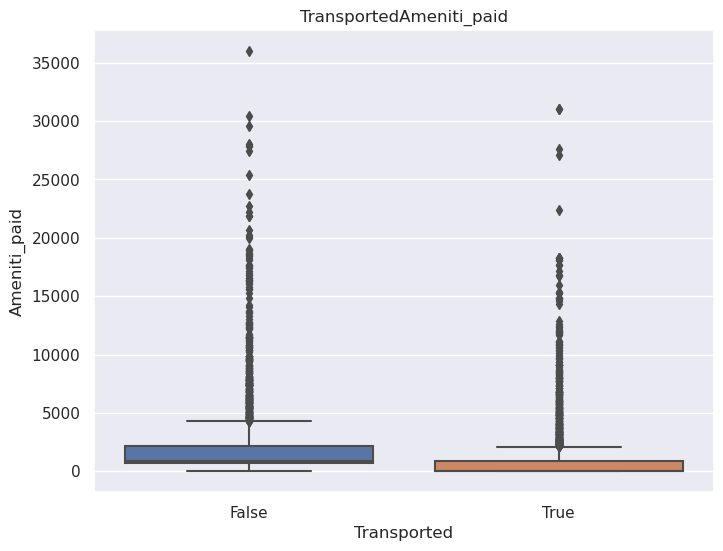

In [28]:
df_train_paid_transport = df_train_filt[['Ameniti_paid', 'Transported']]
sns_boxplot(df_train_paid_transport, 'Transported', 'Ameniti_paid')

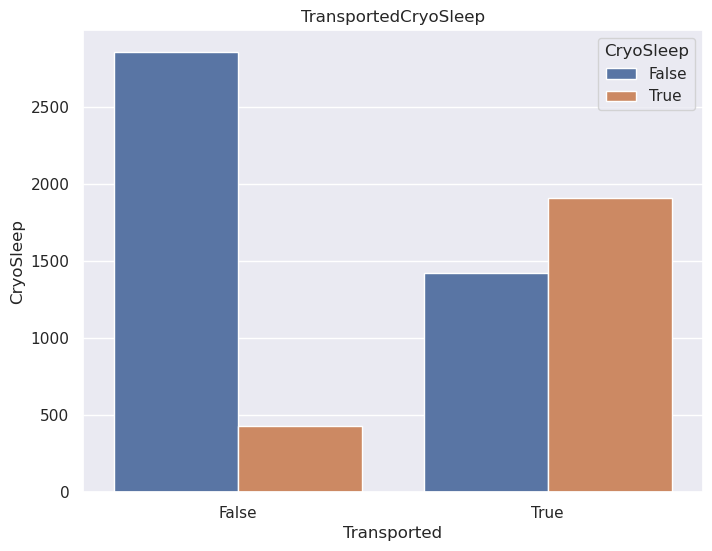

In [29]:
df_train_cryosleep_transported = df_train_filt[['CryoSleep', 'Transported']]
sns_countplot(df_train_cryosleep_transported, 'Transported', 'CryoSleep')

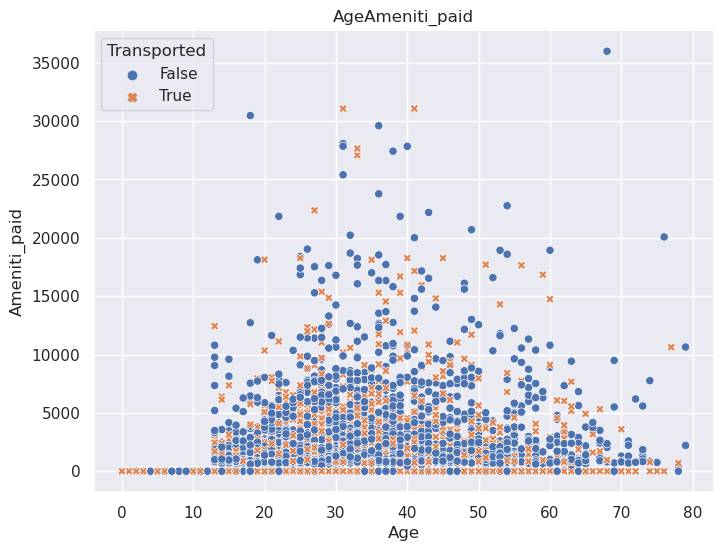

In [30]:
df_train_age_amen = df_train_filt[['Age', 'Ameniti_paid', 'Transported']]
sns_scatter(df_train_age_amen, 'Age', 'Ameniti_paid', 'Transported')

# SNS Heatmap

In [31]:
df_train_filt

df_train_NaDrop

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Pri_cabin,Sub_cabin,Cabin_num,Ameniti_paid
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,B,0,P,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,Juanna Vines,True,F,0,S,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,Altark Susent,False,A,0,S,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,Solam Susent,False,A,0,S,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,Willy Santantines,True,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,Gravior Noxnuther,False,A,98,P,8536.0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,Kurta Mondalley,False,G,1499,S,0.0
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,Fayey Connon,True,G,1500,S,1873.0
8691,9280_01,Europa,False,55 Cancri e,32.0,False,Celeon Hontichre,False,E,608,S,4637.0


In [32]:
from sklearn.preprocessing import LabelEncoder

def heatmap(df):
    df = factorize_obj(df)
    
    encoder = LabelEncoder()
    cat = df.select_dtypes(include=['object']).columns
    
    for i in cat:
        df[i] = encoder.fit_transform(df[i])
        
    corr_mat = df.corr()
    
    sns.heatmap(corr_mat, cmap='RdBu', vmin=-1, vmax=1, linewidths=0.5)
    plt.show()

/tmp/ipykernel_32/480565676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i], _ = df[i].factorize()
/tmp/ipykernel_32/480565676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i], _ = df[i].factorize()
/tmp/ipykernel_32/480565676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

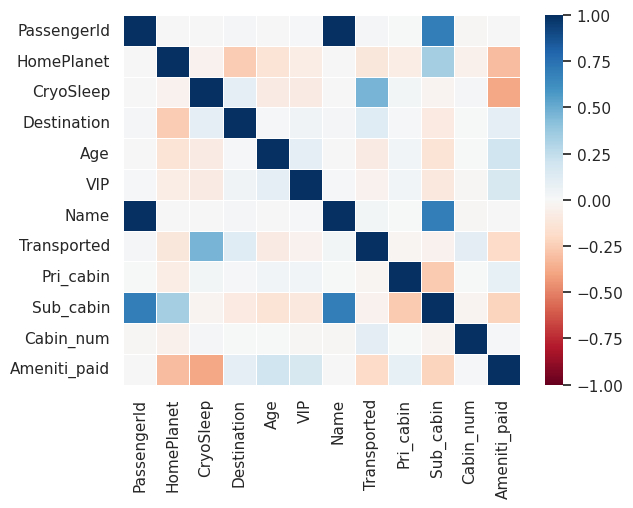

In [33]:
heatmap(df_train_filt)

# Filling in NaN

In [34]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [35]:
df_train_fill = df_train.copy()

In [36]:
df_train_fill.loc[df_train_fill['CryoSleep'] == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0

In [37]:
df_train_fill.loc[df_train_fill['Age'] <= 12, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0

In [38]:
df_train_fill

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [39]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [40]:
df_train_fill.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     107
FoodCourt       106
ShoppingMall    103
Spa             114
VRDeck          107
Name            200
Transported       0
dtype: int64

In [41]:
column_sum = df_train_fill[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

randval = np.random.randn(column_sum.eq(0).sum())

df_train_fill.loc[column_sum.eq(0), 'Age'] = randval

In [42]:
df_train_fill.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age              90
VIP             203
RoomService     107
FoodCourt       106
ShoppingMall    103
Spa             114
VRDeck          107
Name            200
Transported       0
dtype: int64

Feature: PassengerId, MI: 0.010357811492677671
Feature: HomePlanet, MI: 0.014435475546934473
Feature: CryoSleep, MI: 0.11806179230343794
Feature: Cabin, MI: 0.014406487094996034
Feature: Destination, MI: 0.010806146746362932
Feature: Age, MI: 0.11873893047883843
Feature: VIP, MI: 0.0
Feature: RoomService, MI: 0.07526117447340042
Feature: FoodCourt, MI: 0.04264229792635699
Feature: ShoppingMall, MI: 0.05120479821272417
Feature: Spa, MI: 0.07724435264164842
Feature: VRDeck, MI: 0.062182681172396226
Feature: Name, MI: 0.012036657258280403
Feature: Transported, MI: 0.6933079033218916


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


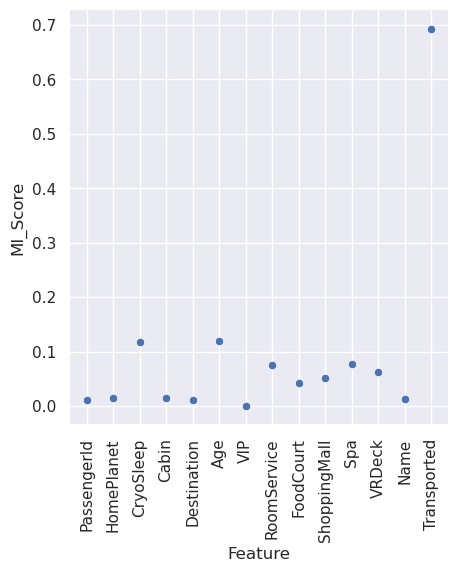

In [43]:
df_train_fill.dropna(axis=0, inplace=True)
df_train_plot = mu_info(df_train_fill)
plot_sns(df_train_plot)

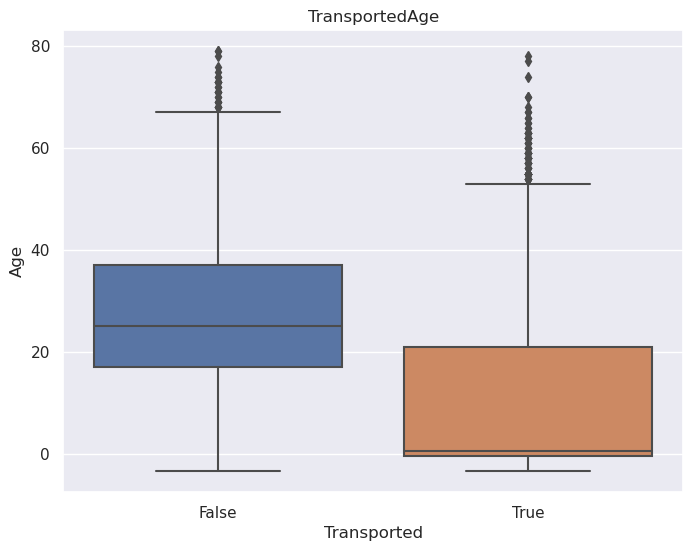

In [44]:

sns_boxplot(df_train_fill, 'Transported', 'Age')

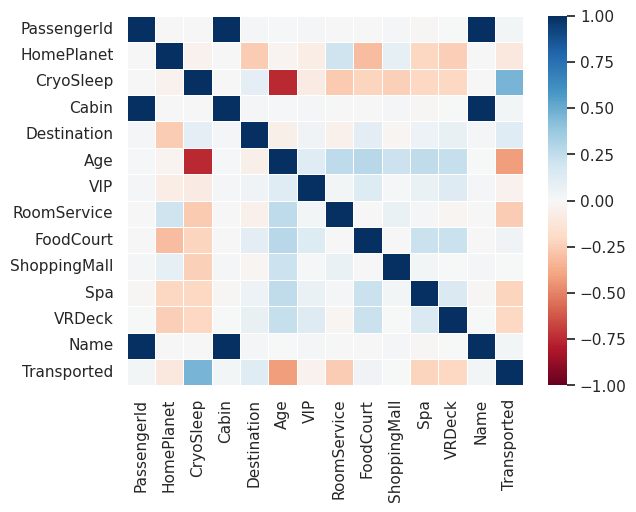

In [45]:
heatmap(df_train_fill)

<Axes: xlabel='Age', ylabel='Count'>

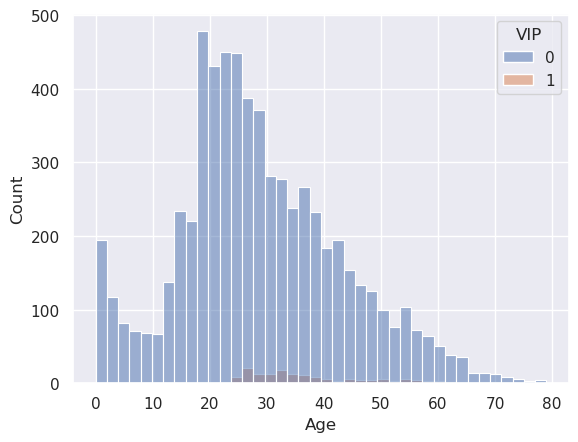

In [46]:
sns.histplot(data=df_train_filt, x="Age", hue='VIP')